# Overfitting - regularization

### 1. Dataset splitting into train and test

In [73]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [74]:
print(raw_df.keys())
print(data.shape)
print(raw_df.describe())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
(506, 13)
                0            1            2           3           4   \
count  1012.000000  1012.000000  1012.000000  506.000000  506.000000   
mean    180.143778    12.008350    16.834792    0.069170    0.554695   
std     188.132839    17.250728     9.912616    0.253994    0.115878   
min       0.006320     0.000000     0.460000    0.000000    0.385000   
25%       0.257830     0.000000     8.375000    0.000000    0.449000   
50%      24.021000     7.240000    18.100000    0.000000    0.538000   
75%     391.435000    16.780000    21.890000    0.000000    0.624000   
max     396.900000   100.000000    50.000000    1.000000    0.871000   

               5           6           7           8           9           10  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  
std      0.702617   28.148861    2.1057

In [75]:
X = data
y = target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_train_std

506
0.7984189723320159
0.2015810276679842


array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

### 2. Linear regression

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

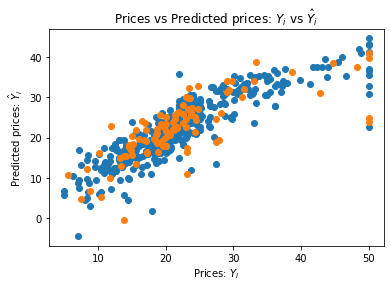

In [77]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
 
regr.fit(X_train_std, y_train)

y_train_pred = regr.predict(X_train_std)
y_test_pred = regr.predict(X_test_std)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [78]:
error_test = mean_squared_error(y_test, y_test_pred)
error_train = mean_squared_error(y_train, y_train_pred)
score_test = regr.score(X_test_std, y_test)
score_train = regr.score(X_train_std, y_train)

print("Test Error: {}\nTrain Error: {}\nTest score: {}\nTrain score: {}".format(error_test, error_train, score_test, score_train))

Test Error: 35.11642077929317
Train Error: 19.32647020358573
Test score: 0.5687450086990026
Train score: 0.7730135569264233


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

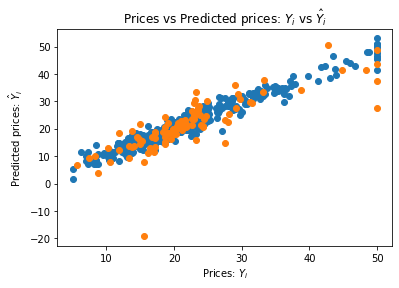

In [79]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)

X_std = scaler.fit_transform(X)
X_pol = polynomial_features.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, train_size=0.8, test_size=0.2, random_state=0)

pol_reg = LinearRegression()

pol_reg.fit(X_train, y_train)

y_train_pred = pol_reg.predict(X_train)
y_test_pred = pol_reg.predict(X_test)

plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [80]:
error_test = mean_squared_error(y_test, y_test_pred)
error_train = mean_squared_error(y_train, y_train_pred)
score_test = pol_reg.score(X_test, y_test)
score_train = pol_reg.score(X_train, y_train)

print("Test Error: {}\nTrain Error: {}\nTest score: {}\nTrain score: {}".format(error_test, error_train, score_test, score_train))

Test Error: 31.357452361100147
Train Error: 4.340397372212224
Test score: 0.6149078537872594
Train score: 0.9490226952637445


Test Error: 35 -> 31

Train Error: 19 -> 4

### Lasso

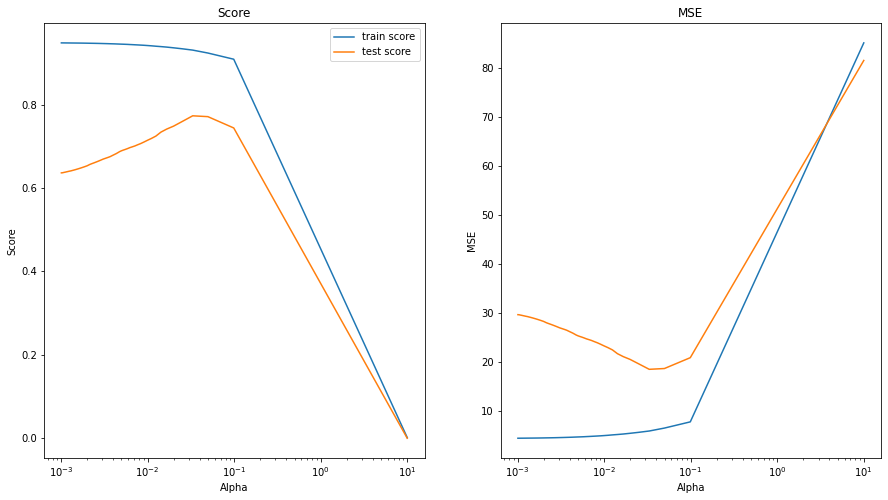

In [81]:
from sklearn.linear_model import Ridge, Lasso

MSE_test = []
MSE_train = []
score_test = []
score_train = []
el = 10
it = [el/i for i in range(1, 10000, 100)]

for i in it:
    lasso = Lasso(alpha=i, max_iter=10000, random_state=0)
    lasso.fit(X_train, y_train)
    y_test_pred = lasso.predict(X_test)
    y_train_pred = lasso.predict(X_train)

    MSE_test.append(mean_squared_error(y_test, y_test_pred))
    MSE_train.append(mean_squared_error(y_train, y_train_pred))
    score_train.append(lasso.score(X_train, y_train))
    score_test.append(lasso.score(X_test, y_test))

fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(it, score_train, label = 'train score')
ax[0].plot(it, score_test, label = 'test score')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Score')
ax[0].set_title('Score')
ax[0].set_xscale('log')
ax[0].legend()
ax[1].plot(it, MSE_train, label = 'MSE train')
ax[1].plot(it, MSE_test, label = 'MSE test')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('MSE')
ax[1].set_title("MSE")
ax[1].set_xscale('log')

### Ridge

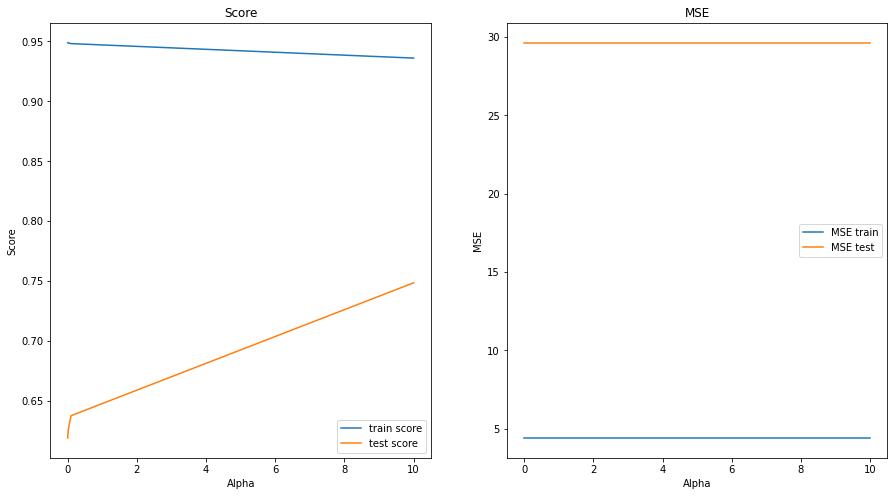

In [82]:
MSE_test = []
MSE_train = []
score_test = []
score_train = []
el = 10
it = [el/i for i in range(1, 10000, 100)]

for i in it:
    ridge = Ridge(alpha=i, max_iter=10000, random_state=0)
    ridge.fit(X_train, y_train)
    y_test_pred = lasso.predict(X_test)
    y_train_pred = lasso.predict(X_train)

    MSE_test.append(mean_squared_error(y_test, y_test_pred))
    MSE_train.append(mean_squared_error(y_train, y_train_pred))
    score_train.append(ridge.score(X_train, y_train))
    score_test.append(ridge.score(X_test, y_test))

fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(it, score_train, label = 'train score')
ax[0].plot(it, score_test, label = 'test score')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Score')
ax[0].set_title('Score')
ax[0].legend()
ax[1].plot(it, MSE_train, label = 'MSE train')
ax[1].plot(it, MSE_test, label = 'MSE test')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('MSE')
ax[1].set_title("MSE")
ax[1].legend()

### Regularization for Logistic Regression

Accuracy for alpha=0.0001:  0.6666666666666666
Accuracy for alpha=0.0527:  0.9649122807017544
Accuracy for alpha=0.1054:  0.9736842105263158
Accuracy for alpha=0.1580:  0.9736842105263158
Accuracy for alpha=0.2106:  0.9736842105263158
Accuracy for alpha=0.2632:  0.9736842105263158
Accuracy for alpha=0.3159:  0.9736842105263158
Accuracy for alpha=0.3685:  0.9824561403508771
Accuracy for alpha=0.4211:  0.9824561403508771
Accuracy for alpha=0.4737:  0.9824561403508771
Accuracy for alpha=0.5264:  0.9736842105263158
Accuracy for alpha=0.5790:  0.9736842105263158
Accuracy for alpha=0.6316:  0.9736842105263158
Accuracy for alpha=0.6842:  0.9736842105263158
Accuracy for alpha=0.7369:  0.9736842105263158
Accuracy for alpha=0.7895:  0.9736842105263158
Accuracy for alpha=0.8421:  0.9736842105263158
Accuracy for alpha=0.8947:  0.9736842105263158
Accuracy for alpha=0.9474:  0.9736842105263158
Accuracy for alpha=1.0000:  0.9736842105263158


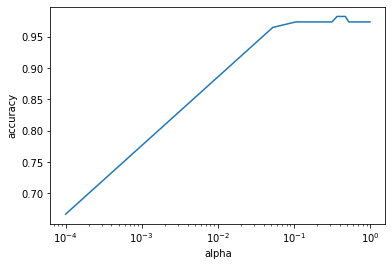

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
 
y = data.target
X = data.data
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, train_size=0.8)

alpha_lst = np.linspace(0.0001, 1, 20)
accuracy = []

for alpha in alpha_lst:
    reg = LogisticRegression(penalty='l2', C=alpha, random_state=0, max_iter=10000).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print('Accuracy for alpha={:.4f}:  {}'.format(alpha, accuracy_score(y_test, y_pred)))

plt.plot(alpha_lst, accuracy)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel('accuracy')
plt.show()